<a href="https://colab.research.google.com/github/David-Junior/Lab-Reports-Undergrad-/blob/main/FMM3_231_Fluid_Mechics_I_Static_Pressure_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

g = 9.8065

In [ ]:
# Square base
base = 5.21 * 0.0254 # inches to m

levels = np.array([14.46, 12.62, 10.65, 8.08]) * 0.0254 # inches to m

massB = 1 # kg
massC = np.array([170, 50, 20, 30]) / 1000 # kg

massB_moved = np.array([11, 9, 6, 2]) * 20 / 1000 # m
massC_distance = 0.42

measured_moments = g * (massB * massB_moved + massC * massC_distance)

R = (320 + 60)/1000 # from pivot to base
l = R - (levels - base) # from pivot to water surface

bottom_edge = levels - base # depth of bottom edge of square
top_edge = bottom_edge - 60/1000 # depth of top edge of square

def square_moment(x, l):
  return 0.06 * 1000 * g * (x**3/3 + l * x**2/2)

theoretical_moments = square_moment(bottom_edge, l) - square_moment(top_edge, l)

In [ ]:
df = pd.DataFrame({
    'levels': levels,
    'massB_moved': massB_moved,
    'massC': massC,
    'measured_moments': measured_moments,
    'l': l,
    'top_edge (y)': top_edge,
    'bottom_edge': bottom_edge,
    'theoretical_moments': theoretical_moments
})

In [ ]:
df

,levels,massB_moved,massC,measured_moments,l,top_edge (y),bottom_edge,theoretical_moments
0,0.367284,0.22,0.17,2.857614,0.145050,0.174950,0.234950,2.542992
1,0.320548,0.18,0.05,1.971106,0.191786,0.128214,0.188214,1.965513
2,0.270510,0.12,0.02,1.259155,0.241824,0.078176,0.138176,1.347234
3,0.205232,0.04,0.03,0.515822,0.307102,0.012898,0.072898,0.540647


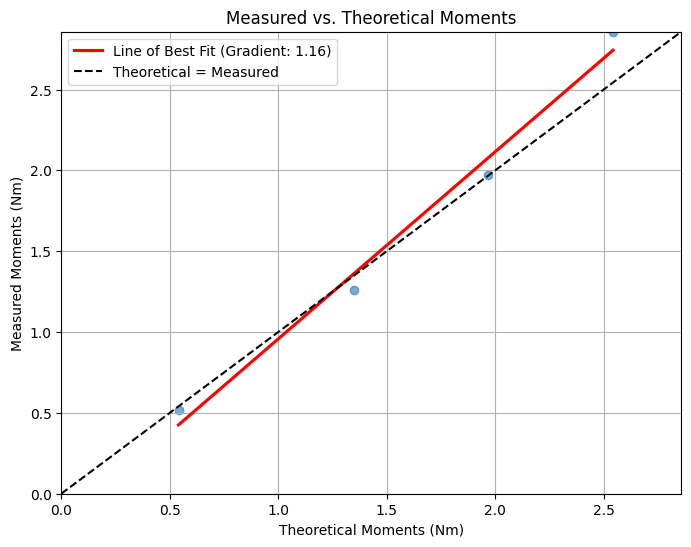

In [ ]:
import scipy.stats

plt.figure(figsize=(8, 6))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['theoretical_moments'], df['measured_moments'])
line_label = f'Line of Best Fit (Gradient: {slope:.2f})'
sns.regplot(x='theoretical_moments', y='measured_moments', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'label':line_label}, ci=False)

min_val = min(df['theoretical_moments'].min(), df['measured_moments'].min())
max_val = max(df['theoretical_moments'].max(), df['measured_moments'].max())
plt.plot([0, max_val], [0, max_val], 'k--', label='Theoretical = Measured')

plt.xlabel('Theoretical Moments (Nm)')
plt.ylabel('Measured Moments (Nm)')
plt.title('Measured vs. Theoretical Moments')
plt.legend()
plt.grid(True)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.show()

In [ ]:
# Triangle base
base = 2 / 100

levels = np.array([24.47, 21.43, 15.58, 9.34]) / 100

massB = 1 # kg
massC = np.array([40, 20, 0, 40]) / 1000 # kg

massB_moved = np.array([5, 4, 3, 0]) * 20 / 1000 # m
massC_distance = 0.42

measured_moments = g * (massB * massB_moved + massC * massC_distance)

R = (320 + 60)/1000 # from pivot to base
l = R - (levels - base) # from pivot to water surface

bottom_edge = levels - base # depth of bottom edge of square
top_edge = bottom_edge - 60/1000 # (y) depth of top edge of square

def triangle_moment(x, l, y):
  return 1000 * g * (x**2 * (3*x**2 + (4*l - 4*y)*x - 6*l*y)) / 12

theoretical_moments = triangle_moment(bottom_edge, l, top_edge) - triangle_moment(top_edge, l, top_edge)

In [ ]:
df = pd.DataFrame({
    'levels': levels,
    'massB_moved': massB_moved,
    'massC': massC,
    'measured_moments': measured_moments,
    'l': l,
    'top_edge (y)': top_edge,
    'bottom_edge': bottom_edge,
    'theoretical_moments': theoretical_moments
})

In [ ]:
df

,levels,massB_moved,massC,measured_moments,l,top_edge (y),bottom_edge,theoretical_moments
0,0.2447,0.10,0.04,1.145399,0.1553,0.1647,0.2247,1.304319
1,0.2143,0.08,0.02,0.866895,0.1857,0.1343,0.1943,1.111139
2,0.1558,0.06,0.00,0.588390,0.2442,0.0758,0.1358,0.739394
3,0.0934,0.00,0.04,0.164749,0.3066,0.0134,0.0734,0.342867


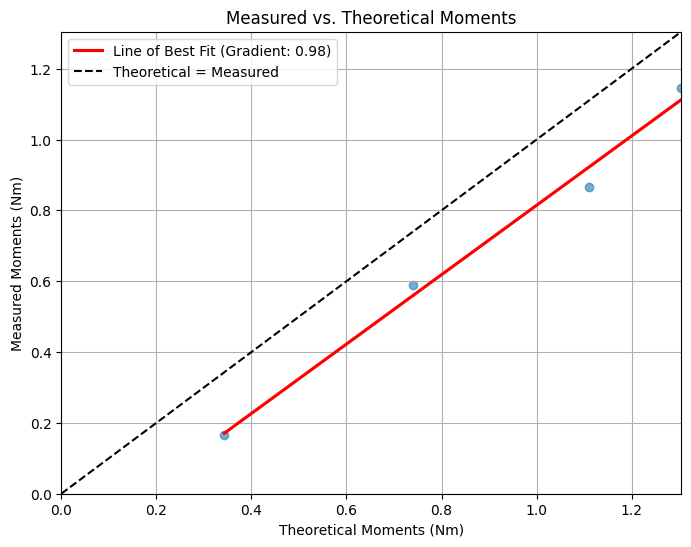

In [ ]:
import scipy.stats

plt.figure(figsize=(8, 6))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['theoretical_moments'], df['measured_moments'])
line_label = f'Line of Best Fit (Gradient: {slope:.2f})'
sns.regplot(x='theoretical_moments', y='measured_moments', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'label':line_label}, ci=False)

min_val = min(df['theoretical_moments'].min(), df['measured_moments'].min())
max_val = max(df['theoretical_moments'].max(), df['measured_moments'].max())
plt.plot([0, max_val], [0, max_val], 'k--', label='Theoretical = Measured')

plt.xlabel('Theoretical Moments (Nm)')
plt.ylabel('Measured Moments (Nm)')
plt.title('Measured vs. Theoretical Moments')
plt.legend()
plt.grid(True)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.show()